## ISM Homework 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erf

Problem 2.1 - critical densities of CO emission lines

In [3]:
#from 12C16O-H2 file
dat_emission = pd.read_csv('/Users/sidneylower/Desktop/co.txt', delim_whitespace=True)
dat_coll = pd.read_csv('/Users/sidneylower/Desktop/co_coll.txt', delim_whitespace=True)

Critical density == Einstein A / collisional coefficient

--> Threshold for whether gas is in thermal equilibrium (n >> n_cr)

In [4]:
einstein_a = dat_emission['EINSTEINA(s^-1)'][:10] #s^-1
coll_coeff = dat_coll['COLLRATES(cm^3'] #cm^3 / s

In [5]:
einstein_a, coll_coeff

(0    7.203000e-08
 1    6.910000e-07
 2    2.497000e-06
 3    6.126000e-06
 4    1.221000e-05
 5    2.137000e-05
 6    3.422000e-05
 7    5.134000e-05
 8    7.330000e-05
 9    1.006000e-04
 Name: EINSTEINA(s^-1), dtype: float64, 0    3.302000e-11
 1    7.150000e-11
 2    7.946000e-11
 3    8.114000e-11
 4    6.553000e-11
 5    5.799000e-11
 6    5.807000e-11
 7    6.315000e-11
 8    7.198000e-11
 9    8.031000e-11
 Name: COLLRATES(cm^3, dtype: float64)

In [6]:
critical_density = einstein_a / coll_coeff #cm^-3

In [7]:
line = np.arange(1, 11)

In [8]:
critical_density

0    2.181405e+03
1    9.664336e+03
2    3.142462e+04
3    7.549914e+04
4    1.863269e+05
5    3.685118e+05
6    5.892888e+05
7    8.129850e+05
8    1.018338e+06
9    1.252646e+06
dtype: float64

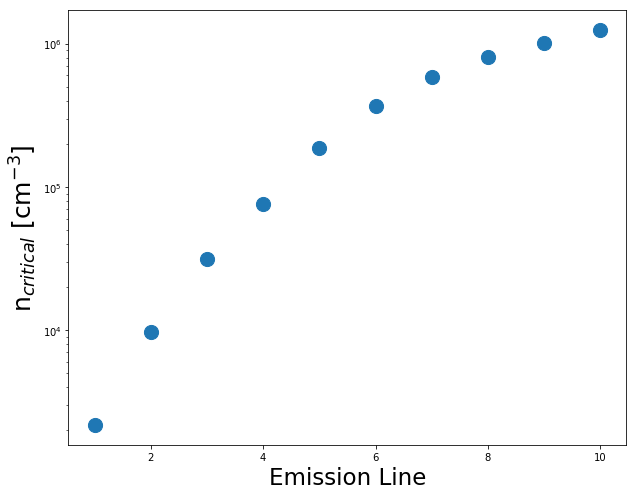

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(line, critical_density, s=200)
plt.ylabel('n$_{critical}$ [cm$^{-3}$]', fontsize=25)
plt.xlabel('Emission Line', fontsize=23)
plt.yscale('log')

Problem 2.2 - mass fraction of gas at densities > n_cr

Mass fraction = M_cl(>n) / M_cl from Krumholz & Thompson (2007)

In [10]:
def mass_fraction(density, median_density, mach_number):
    
    sigma = np.sqrt(np.log(1 + (3./4.)*mach_number**2))
    
    mean_density = median_density * np.exp(-sigma**2 / 2)
    
    x = density / mean_density
    
    top = -2. * np.log(x) + sigma**2
    bottom = 2.**(3./2.) * sigma
    
    mass_fraction = 0.5 * (1 + erf(top / bottom))
    
    return mass_fraction

In [11]:
mass_fractions = []
for i in range(10):
    mass_fractions.append(mass_fraction(critical_density[i], 100., 10.)) #100 = median density, 10 = Mach number

(1e-06, 1.0)

<Figure size 720x576 with 0 Axes>

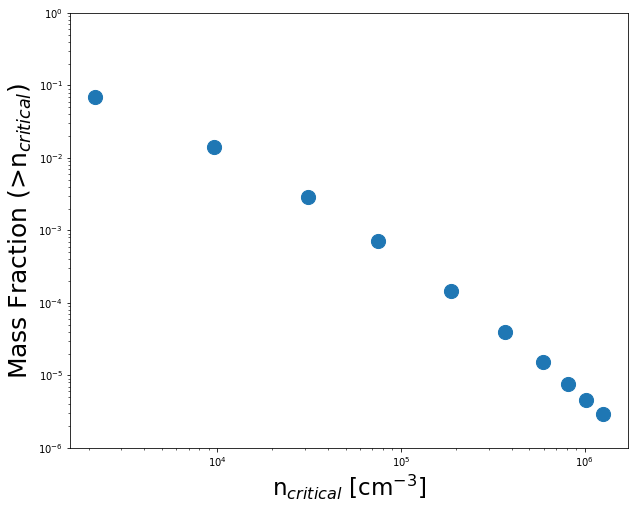

In [18]:
plt.figure(figsize=(10, 8))
plt.figure(figsize=(10, 8))
plt.scatter(critical_density, mass_fractions, s=200)
plt.ylabel('Mass Fraction (>n$_{critical}$)', fontsize=25)
plt.xlabel('n$_{critical}$ [cm$^{-3}$]', fontsize=23)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-6, 1e0])


In [19]:
mass_fractions

[0.06926923025439002,
 0.014027743761185651,
 0.0028625456494520973,
 0.0007254671101699639,
 0.0001482019629466258,
 3.9712415957571245e-05,
 1.5116105895884857e-05,
 7.580284683061933e-06,
 4.6129264219541e-06,
 2.892819130462243e-06]

Problem 4 - Kinetic temperature of emitting gas

In [48]:
L_line = 8.75e25 #J/s
r = 3.1e17 #m, radius of cloud
c = 3.0e8 #m/s
k_B = 1.38e-23 #J/K
v0 = 115.0e9 #Hz
fwhm = 1000. #m/s
delta_v = (fwhm / c) * v0


In [73]:
T_k = (L_line / (4.0 * np.pi * r**2)) * (3/2) * (c**2/k_B) * (1.0 / ((v0 + 0.5*delta_v)**3 - (v0 - 0.5*delta_v)**3))

In [74]:
T_k

46.60537023228189